In [93]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

In [94]:
df = pd.read_csv(r"C:\Users\Hamit_DNCAcc\DSMay22\Project2_Selenium\Media_Markt_Float_Values.csv")

In [95]:
df.drop(["Unnamed: 0","Unnamed: 0.1"], axis=1,inplace=True)

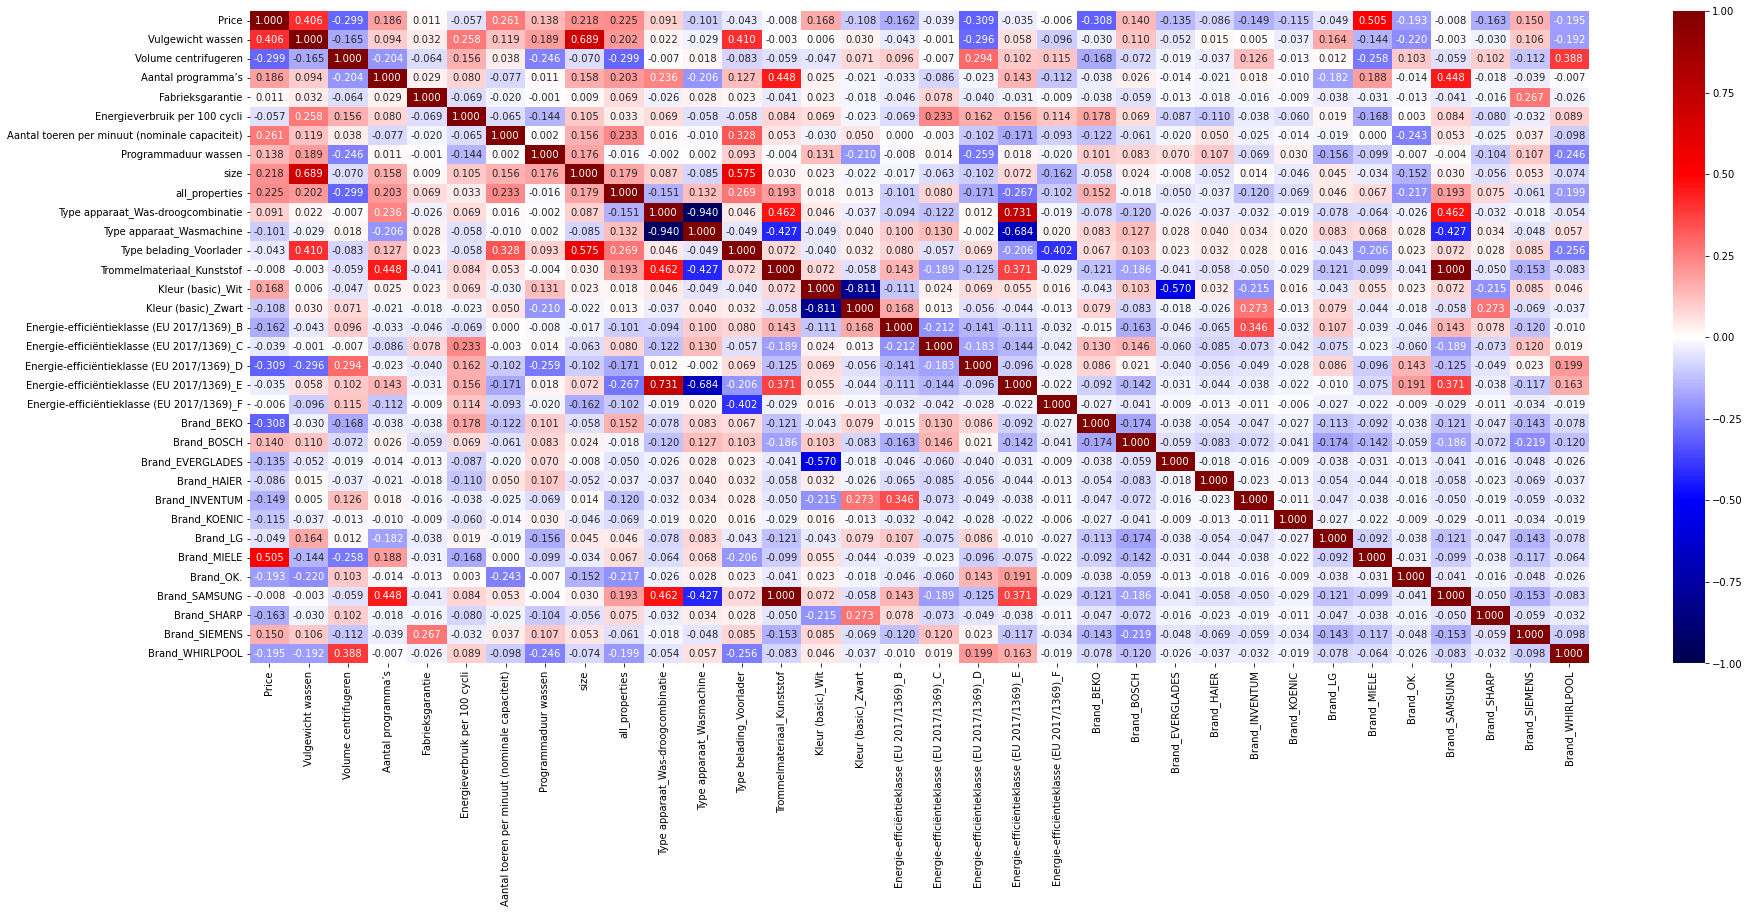

In [96]:
plt.figure(figsize=[30,12])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.3f');
plt.savefig('seismic_mediamarkt.png', dpi=300)

In [124]:
def assign_y_X(y,X,df):
    y = df["Price"]
    X = df.drop(columns=["Price"],axis=1)
    return (y,X)

def train_test_split_(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    return (X_train, X_test, y_train, y_test)

def ols_stats_(y_train,X_train):
    #X_train = sm.add_constant(X_train)
    result = sm.OLS(y_train, X_train).fit()
    # printing the summary table
    print(result.summary())
    
def linear_regression_(X_train, y_train):
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    len(y_pred)
    len(y_test)
    return r2_score(y_test,y_pred)

In [138]:
y,X = assign_y_X(y,X,df)

In [139]:
X_train, X_test, y_train, y_test = train_test_split_(X, y)

In [140]:
ols_stats_(y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     13.65
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           7.34e-23
Time:                        12:36:14   Log-Likelihood:                -770.09
No. Observations:                 125   AIC:                             1602.
Df Residuals:                      94   BIC:                             1690.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           131.0835     16.373      8.006      0.0

In [141]:
#First try with existing datas
linear_regression_(X_train, y_train)

0.815402907770721

In [142]:
X_train, X_test, y_train, y_test = X_train/10, X_test/10, y_train/10, y_test/10

In [143]:
X_train[0]

array([9.000000e-01, 7.200000e+00, 1.500000e+00, 2.000000e-01,
       6.600000e+00, 1.400000e+02, 2.170000e+01, 2.981329e+04,
       1.200000e+00, 0.000000e+00, 1.000000e-01, 1.000000e-01,
       0.000000e+00, 1.000000e-01, 0.000000e+00, 0.000000e+00,
       1.000000e-01, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.000000e-01, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00])

In [144]:
ols_stats_(y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     13.65
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           7.34e-23
Time:                        12:36:26   Log-Likelihood:                -482.26
No. Observations:                 125   AIC:                             1027.
Df Residuals:                      94   BIC:                             1114.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           131.0835     16.373      8.006      0.0

In [145]:
#Second try with /10 scaling
linear_regression_(X_train, y_train)

0.8154029077705842